# Statistical Tests Decision Tree

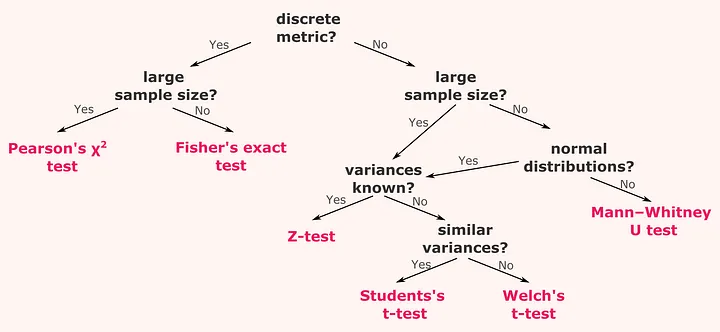

Casalegno, F. 2021. A/B Testing: A Complete Guide to Statistical Testing. Towards Data Science. https://towardsdatascience.com/a-b-testing-a-complete-guide-to-statistical-testing-e3f1db140499

# Libraries & Dependencies

In [1]:
import numpy as np
import pandas as pd
import math
from statsmodels.stats.power import TTestIndPower

# Data

In [2]:
df = pd.read_csv('PlaytimeDurationD0.csv').dropna()

# Sample size & Power

In [3]:
# Filter the DataFrame to select only the rows where accessed_d0 is equal to 1 (Group 1).
# Then, select only the 'playtime' column from those rows.
group1 = df[df['Test Group'] == 0]['Playtime']

# Do the same for Group 2, where accessed_d0 is equal to 0.
group2 = df[df['Test Group'] == 1]['Playtime']

# Calculate the mean playtime for Group 1 by calling the mean() method on group1.
group1_mean = group1.mean()

# Calculate the mean playtime for Group 2 by calling the mean() method on group2.
group2_mean = group2.mean()

# Calculate the pooled standard deviation, which is a weighted average of the standard deviations of the two groups.
# First, find the variance for each group using np.var() and multiply by the degree of freedom (len(group1) - 1 or len(group2) - 1).
# Sum the two values and then divide by the total degree of freedom (len(group1) + len(group2) - 2) for both groups combined.
# Finally, take the square root of the result using np.sqrt() to get the pooled standard deviation.
pooled_std_dev = np.sqrt(
    (
    (len(group1) - 1) * np.var(group1) +
    (len(group2) - 1) * np.var(group2)
    )
    
    / (len(group1) + len(group2) - 2))


In [4]:
print(
f"""Group 1 mean: {round(group1.mean(),2)} m 
Group 2 mean: {round(group2.mean(),2)} m
Absolute difference {round(group1.mean()-group2.mean(),2)} m
Percent difference {round(group1.mean()-group2.mean() / ((group1.mean()+ group2.mean())/2),2)}%
""") #percent difference

Group 1 mean: 42.57 m 
Group 2 mean: 40.33 m
Absolute difference 2.24 m
Percent difference 41.6%



In [5]:
# Set the parameters needed for power analysis
effect_size = (group1_mean - group2_mean) / pooled_std_dev  # Difference in means divided by pooled standard deviation

alpha = 0.05  # Significance level
ratio = len(group2) / len(group1)  # Ratio of sample sizes of group2 to group1
power = 0.80  # Desired power level (can adjust as needed)

# Initialize the power analysis object
power_analysis = TTestIndPower()

# Calculate the sample size required for a given effect size, alpha, power, and sample size ratio
# You can adjust the parameters as needed to compute the required sample size
sample_size_per_group = power_analysis.solve_power(effect_size=effect_size, power=power, alpha=alpha, ratio=ratio)

# If you want to compute the power given the effect size, alpha, and sample sizes
observed_power = power_analysis.solve_power(effect_size=effect_size, nobs1=len(group1), alpha=alpha, ratio=ratio)

print(f"Sample size per group: {int(sample_size_per_group)}")
print(f"Current sample size Group1: {int(len(group1))} and Group2: {int(len(group2))}")
print(f"Observed power: {round(float(observed_power),2)}")


Sample size per group: 8377
Current sample size Group1: 5472 and Group2: 5444
Observed power: 0.62


# Check for normlaity

C:\Users\admin\anaconda3\envs\YouTube\lib\site-packages\seaborn\_core.py:1218: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\admin\anaconda3\envs\YouTube\lib\site-packages\seaborn\_core.py:1218: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


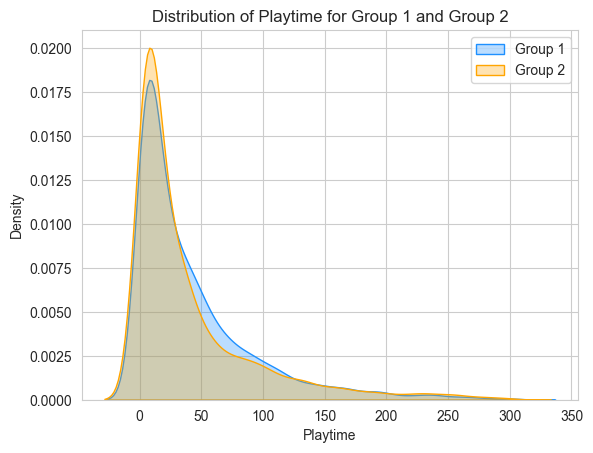

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Plot the distribution of playtime for both groups using KDE plots
sns.kdeplot(group1, color="dodgerblue", label="Group 1", fill=True, common_norm=False, alpha=0.3)
sns.kdeplot(group2, color="orange", label="Group 2", fill=True, common_norm=False, alpha=0.3)

# Add a title and legend to the plot
plt.title('Distribution of Playtime for Group 1 and Group 2')
plt.xlabel('Playtime')
plt.ylabel('Density')
plt.legend()

# Display the plot
plt.show()


In [7]:
from scipy.stats import kstest
from scipy.stats import norm

# Testing if group1 is normally distributed
stat, p = kstest(group1, 'norm', args=(group1.mean(), group1.std()))

print('Statistics=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Group 1 looks Gaussian (fail to reject H0)')
else:
    print('Group 1 does not look Gaussian (reject H0)')


Statistics=0.198, p=0.000
Group 1 does not look Gaussian (reject H0)


In [8]:
# Testing if group1 is normally distributed
stat, p = kstest(group2, 'norm', args=(group1.mean(), group1.std()))

print('Statistics=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Group 2 looks Gaussian (fail to reject H0)')
else:
    print('Group 2 does not look Gaussian (reject H0)')


Statistics=0.222, p=0.000
Group 2 does not look Gaussian (reject H0)


# Mann-Whitney U Test

In [9]:
from scipy import stats

# Perform the Mann-Whitney U test
u_statistic, p_value = stats.mannwhitneyu(group1, group2, alternative='two-sided')

alpha = 0.05  # You can set your significance level

if p_value < alpha:
    print(f'U Statistic: {int(u_statistic)}')
    print(f'P-Value: {round(p_value,2)}')
    print('There is a significant difference between the two groups (Reject H0)')
else:
    print(f'U Statistic: {int(u_statistic)}')
    print(f'P-Value: {round(p_value,2)}')
    print('There is no significant difference between the two groups (Fail to reject H0)')

U Statistic: 15826662
P-Value: 0.0
There is a significant difference between the two groups (Reject H0)
